# Imports

In [23]:
import tensorflow as tf
import tensorflow_io as tfio

In [24]:
from IPython.display import Audio

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

In [26]:
%load_ext autoreload 
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from birds.data.spectrogram import generate_tensor, generate_spectrogram
from birds.data.spectrogram import generate_mel_spectrogram, generate_db_scale_mel_spectrogram

# Tensorflow Dataset

## Import functions from `spectrogram.py`

In [39]:
directory = '../raw_data/data_30s/train/'
df = pd.read_csv(directory + 'y_train.csv')
df.head()

,Path,Target
0,Sonus-naturalis-447407_tens.ogg,0
1,Sonus-naturalis-387437_tens.ogg,0
2,Sonus-naturalis-383228_tens.ogg,0
3,Sonus-naturalis-358240_tens.ogg,0
4,Sonus-naturalis-397031_tens.ogg,0


In [40]:
file_paths = directory + df['Path'].values
labels = df['Target'].values

In [41]:
path_example = file_paths[50]
label_example = labels[50]

In [43]:
generate_mel_spectrogram(path_example, label_example)

(<tf.Tensor: shape=(128, 625, 1), dtype=float32, numpy=
 array([[[0.00000000e+00],
         [0.00000000e+00],
         [2.45006726e-04],
         ...,
         [1.38877332e-01],
         [1.19903348e-02],
         [3.34953852e-02]],
 
        [[0.00000000e+00],
         [0.00000000e+00],
         [2.39668982e-04],
         ...,
         [1.27749830e-01],
         [8.14723130e-03],
         [3.77614051e-02]],
 
        [[0.00000000e+00],
         [0.00000000e+00],
         [2.25729775e-04],
         ...,
         [1.07779965e-01],
         [3.32684093e-03],
         [4.29967456e-02]],
 
        ...,
 
        [[0.00000000e+00],
         [0.00000000e+00],
         [6.36583063e-05],
         ...,
         [4.19081002e-03],
         [1.50359683e-02],
         [9.78403445e-03]],
 
        [[0.00000000e+00],
         [0.00000000e+00],
         [2.98568848e-05],
         ...,
         [2.57467804e-03],
         [6.53252425e-03],
         [6.15732791e-03]],
 
        [[0.00000000e+00],
       

In [44]:
ds_train = tf.data.Dataset.from_tensor_slices((file_paths, labels))
print(ds_train)

ds_train = ds_train.map(generate_mel_spectrogram).batch(5)
print(ds_train)

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>
<BatchDataset shapes: ((None, None, None, 1), (None,)), types: (tf.float32, tf.int64)>


In [45]:
spectrogram, label = next(iter(ds_train))

In [46]:
spectrogram.numpy().shape

(5, 128, 625, 1)

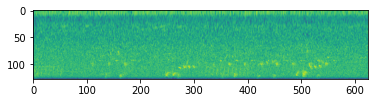

In [31]:
plt.imshow(tf.math.log(spectrogram.numpy()[0, :, :]));

# First model

In [2]:
from tensorflow.keras import models, layers

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(128, 625, 1)))
model.add(layers.Conv2D(4, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='softmax')) 

model.summary() 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 623, 6)       60        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 124, 621, 4)       220       
_________________________________________________________________
flatten_1 (Flatten)          (None, 308016)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15400850  
Total params: 15,401,130
Trainable params: 15,401,130
Non-trainable params: 0
_________________________________________________________________
